# SCS 3546: Deep Learning
> Assignment 1: Deep Learning Using Keras

### Your name & student number:

<pre> Gordon Chan </pre>

<pre> qq525548 </pre>

## Assignment Description

In this assignment you will demonstrate your ability to:

- Train a neural network using Keras to solve a regression problem.

- Perform sensible data preprocessing.

- Experiment with hyperparemter tuning and different model architectures to achieve best performance.



### Grade Allocation

**15 points total**

- Part 1: 4 Marks
- Part 2: 9 Marks
- Clarity: 2 Marks

The marks for clarity are awarded for code documentation and how well you explained/supported your answers, including the use of visualizations where appropriate.

In [199]:
# OPTIONAL : For model evaluation and for those who choose to use the KerasRegressor from keras.wrappers, you would need to install tensorflow 2.12 or 2.11.another option is to use the scikeras.
# please note that you may have many options and the below libraries are just meant to help you and to provide options

# !pip install tensorflow==2.12
# from keras.wrappers.scikit_learn import KerasRegressor

# !pip install scikeras
# from scikeras.wrappers import KerasClassifier, KerasRegressor


In [200]:
# setting up the notebook with important libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Preamble

### Hyperparameters

A hyperparameter is a parameter whose value is set before the learning process begins.

Some important Neural Networks hyperparameters include:

- number of hidden layers
- number of neurons
- learning rate
- activation function
- optimizer settings

Hyperparameters are crucial to the performance, speed, and quality of the machine learning models.

Through Hyper parameter optimization, we find a tuple (best combination) of hyperparameters that yields an optimal model which minimizes a predefined loss function on given test data.

Important hyperparameters that could be tuned include:

- num_hidden_layers
- neurons_per_layer
- dropout_rate
- activation
- optimizer
- learning_rate
- batch_size

### Loss Function

- MSE (Mean Squared Error) is used as the score/loss function that will be minimized for hyperparameter optimization.
- In this assignment, we are going to use Cross-Validation to calculate the score (MSE) for a given set of hyperparameter values

- MSE is a desirable metric because by taking the square root gives us an error value we can directly understand in the context of the problem; for example, in this assignment it translates to thousands of dollars

- Note: Your results may vary given the stochastic nature of the algorithm, evaluation procedure, or differences in numerical precision

## Dataset

We will be using mock data for this assignment. the outcome is the sale price for some products. we have created 13 features to predict the sale price.

- import provided mock data into your notebook.

- You are **not** expected to perform Exploratory Data Analysis (EDA) on this dataset.

- For the purpose of this assignment, your model's performance is not an important factor by itself - that is how far your sale price prediction is. The important factor is the changes that you observe when changing model architectures.

- The information that follow are meant to be optional and to help you get familiar with the data. Your efforts on this assignment should focus on **model training and hyperparameter tuning**, not on EDA.


# Assignment Start
***

- Please follow all instructions carefully.

- Use MSE (Mean Squared Error) as the score/loss function that will be minimized during optimization.








#Data Import

The code below imports the data for you as dataframe, then you may need to convert it to numpy arrays.  

In [202]:
# You can use the code below to import the data

# Option 3 - from local using the files that are available
import pandas as pd

# mount the colab
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [288]:
dir = "/content/gdrive/MyDrive/3546/assign_1/"

# Next, You need to upload tables to your G drive -  then you may need to update  paths below
train_y = f"{dir}/y_train.csv"
test_y = f"{dir}/y_test.csv"
train_x = f"{dir}/X_train.csv"
test_x = f"{dir}/X_test.csv"

# load the  data into a pandas dataframe for easy viewing and manipulation
y_train = pd.read_csv(train_y)
y_test = pd.read_csv(test_y)
X_train = pd.read_csv(train_x)
X_test = pd.read_csv(test_x)


## Clean and Transform Data

In [289]:
X_train[:3]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26


In [290]:
y_train[:3]

,Unnamed: 0,0
0,0,15.2
1,1,42.3
2,2,50.0


In [291]:
def clean_transform(data):
  if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data)
  data.set_index('Unnamed: 0', inplace=True)
  return data

In [292]:
X_train = clean_transform(X_train)
X_test = clean_transform(X_test)
y_train = clean_transform(y_train)
y_test = clean_transform(y_test)

In [293]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Unnamed: 0,,,,,,,,,,,,,
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11


In [294]:
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Unnamed: 0,,,,,,,,,,,,,
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21


In [295]:
y_train.head(2)

,0
Unnamed: 0,
0,15.2
1,42.3


In [296]:
y_test.head(2)

,0
Unnamed: 0,
0,7.2
1,18.8


In [297]:
# check for missing values
y_train.isnull().sum()

0    0
dtype: int64

In [298]:
 y_test.isnull().sum()

0    0
dtype: int64

In [299]:
 X_train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [300]:
X_test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [301]:
# Standardize Data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Part 1: Impact of Changing Model Architecture

In this section, we will be comparing a simple single-layer baseline model with two other models having a different network topology.

## a) Baseline model [2 points]

Use Keras to develop a baseline neural network model that has **one single fully-connected hidden layer with the same number of neurons as input features (i.e. 13 neurons).**

Make sure to **standardize** your features (i.e. subtract mean and divide by standard deviation) before training your model. You can also perform any other data-preprocessing that you deem necessary.

- Note: No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transformation.

- The ADAM optimization algorithm should be used to optimize mean squared error loss function.

- Plot learning curves and report on both training and validation performance.

In [302]:
# determine the number of features and number of rows of data
X_train.shape

(404, 13)

In [305]:
model = Sequential()

# input is 13 features
model.add(Dense(units=13, activation='relu', input_shape=(13,)))
# output layer
model.add(Dense(units=1))

# use mae for regression, optimizer is ADAM
model.compile(loss='mean_absolute_error', optimizer='adam')


In [306]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50,verbose=0)
# set verbose to 0 to turn off log

In [307]:
# plotting the loss and validation loss over training epochs.
losses = pd.DataFrame(model.history.history)

In [308]:
def plot_training_loss_and_validation_loss(losses):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  # Plot training loss on the first subplot
  ax1.plot(losses['loss'])
  ax1.set_title('Training Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')

  # Plot validation loss on the second subplot
  ax2.plot(losses['val_loss'])
  ax2.set_title('Validation Loss')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')

  # Show the plots
  plt.tight_layout()
  plt.show()

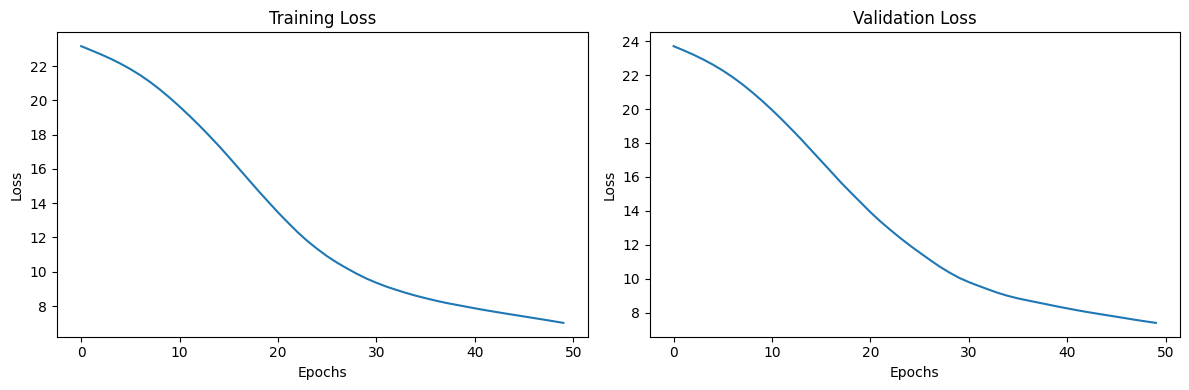

In [309]:
plot_training_loss_and_validation_loss(losses)

## b) Deeper Network [1 point]

Construct and evaluate a model with 2 dense layers having a smaller number of neurons (e.g. 16, 8).

In [310]:
model = Sequential()

# input is 14 features
model.add(Dense(units=16, activation='relu', input_shape=(13,)))
model.add(Dense(units=8,activation='relu'))
# output layer
model.add(Dense(units=1))

# use mae for regression, optimizer is ADAM
model.compile(loss='mean_absolute_error', optimizer='adam')


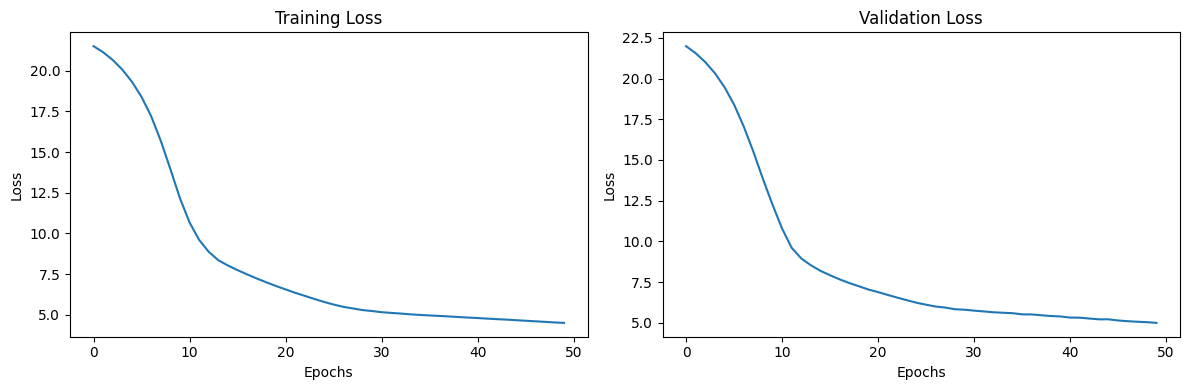

In [311]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

losses = pd.DataFrame(model.history.history)
plot_training_loss_and_validation_loss(losses)

## c) Wider Network [1 point]

Construct and evaluate a wider model with more neurons (e.g. 32, 16).

In [312]:
model = Sequential()

# input is 13 features
model.add(Dense(units=32, activation='relu', input_shape=(13,)))
model.add(Dense(units=16,activation='relu'))
# output layer
model.add(Dense(units=1))

model.compile(loss='mean_absolute_error', optimizer='adam')


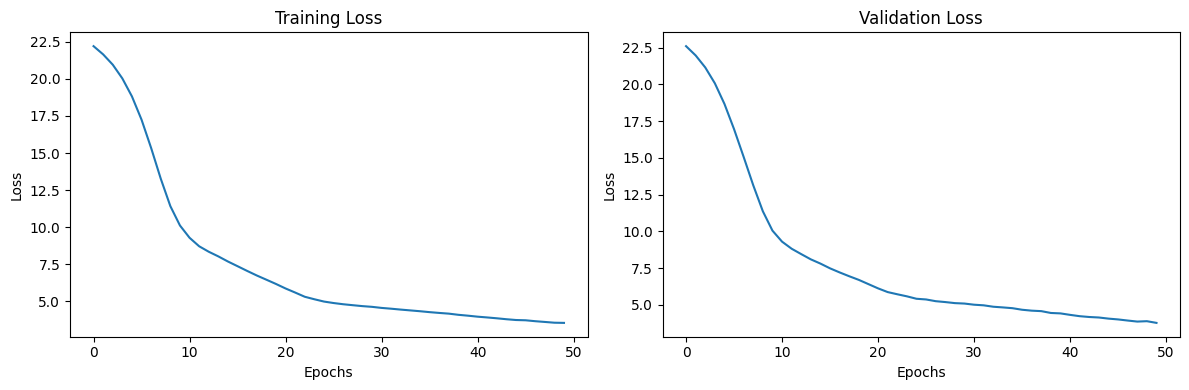

In [313]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

losses = pd.DataFrame(model.history.history)
plot_training_loss_and_validation_loss(losses)

# Part 2: Hyperparameter Tuning Experiments

In the following experiments, you will evaluate and compare models trained with different hyperparameters. Please follow the specifications given for each model.

## a) Model 1 [2 points]

- 2 Dense layers:
  - The first with 64 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds).
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation.
- Report MAE from CV with standard deviation.

In [221]:
import matplotlib.pyplot as plt
import numpy as np

In [222]:
# Define the model
def create_model(input=14, first_layer=14, second_layer=14, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=first_layer, activation=activation, input_shape=(14,)))
    model.add(Dense(units=second_layer, activation=activation))

    model.add(Dense(1))  # Output layer with linear activation (default)
    model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model

In [223]:
# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train)

# Define the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [224]:
train_loss = []
val_loss = []
train_mae = []
val_mae = []

In [225]:
from keras.models import clone_model

def cross_validation(X_train_df, model, optimizer):
  global train_loss
  global val_loss
  global train_mae
  global val_mae

  train_loss = []
  val_loss = []
  train_mae = []
  val_mae = []

  for train_index, val_index in kf.split(X_train_df):

    X_train_fold = X_train_df.iloc[train_index]
    X_val_fold = X_train_df.iloc[val_index]
    y_train_fold = y_train.iloc[train_index]
    y_val_fold = y_train.iloc[val_index]

    model = clone_model(model)
    model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])

    history = model.fit(X_train_fold, y_train_fold,
                        validation_data=(X_val_fold, y_val_fold),
                        epochs=100, verbose=0)  # Set verbose=0 to disable log

    # Store the training and validation losses and MAEs
    train_loss.extend(history.history['loss'])
    val_loss.extend(history.history['val_loss'])
    train_mae.extend(history.history['mean_absolute_error'])
    val_mae.extend(history.history['val_mean_absolute_error'])

In [226]:
# plot learning and cross-validation loss and MAE
def plot_cross_validation_loss_mae():

  epochs = range(0, 301, 20)

  # Plot the learning curves
  plt.figure(figsize=(25, 3))
  plt.subplot(1, 2, 1)
  plt.plot(train_loss, label='Training Loss')
  plt.plot(val_loss, label='Cross-validation Loss')
  plt.title('LOSS')
  plt.legend(loc='upper right')
  plt.xticks(epochs)
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.plot(train_mae, label='Training MAE')
  plt.plot(val_mae, label='Cross-validation MAE')
  plt.title('MAE')
  plt.legend(loc='upper right')
  plt.xticks(epochs)
  plt.grid(True)

  plt.show()

In [227]:
# Calculate the mean and standard deviation of validation MAEs
def cv_mae():
  # Calculate the mean and standard deviation of validation MAEs
  mae_cv_mean = np.mean(val_mae)
  mae_cv_std = np.std(val_mae)

  # Report the MAE from cross-validation with standard deviation
  print("MAE from cross-validation:")
  print('MAE: {:.2f} ± {:.2f}'.format(mae_cv_mean, mae_cv_std))

### Cross-Validation with Model 1

In [228]:
model1 = create_model(first_layer=64, second_layer=64, activation='relu', optimizer='adam')
cross_validation(X_train_df, model1, 'adam')

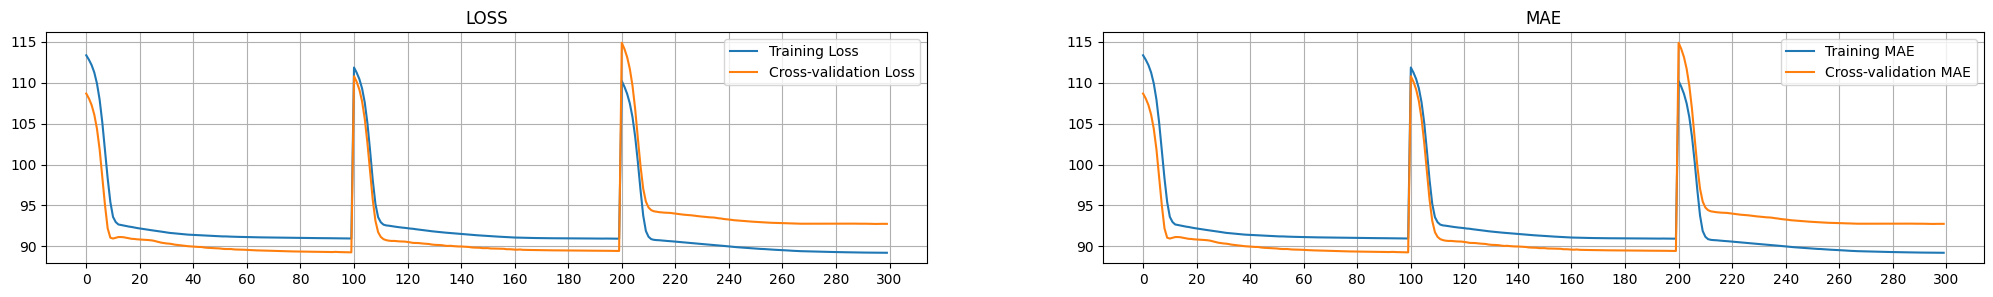

In [229]:
plot_cross_validation_loss_mae()

In [230]:
cv_mae()

MAE from cross-validation:
MAE: 92.22 ± 4.64


## b) Model 2 [2 points]

- 2 Dense layers:
  - The first with 128 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds).
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation.
- Report MAE from CV with standard deviation.

### Cross-Validation with Model2

In [231]:
model2 = create_model(first_layer=128, second_layer=64, activation='relu', optimizer='adam')
cross_validation(X_train_df, model2, 'adam')

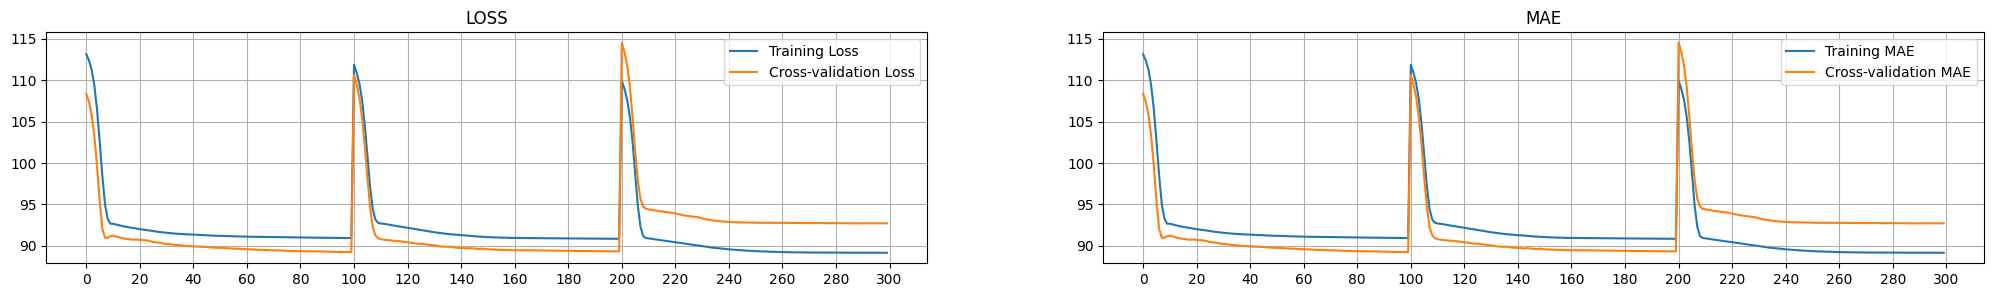

In [232]:
plot_cross_validation_loss_mae()

In [233]:
cv_mae()

MAE from cross-validation:
MAE: 91.88 ± 4.15


## c) Model 3 [2 points]

- Same as Model 2, but use tanh activation functions instead of relu.

### Cross-Validation with Model3

In [234]:
model3 = create_model(first_layer=128, second_layer=64, activation='tanh', optimizer='adam')
cross_validation(X_train_df, model3, 'adam')

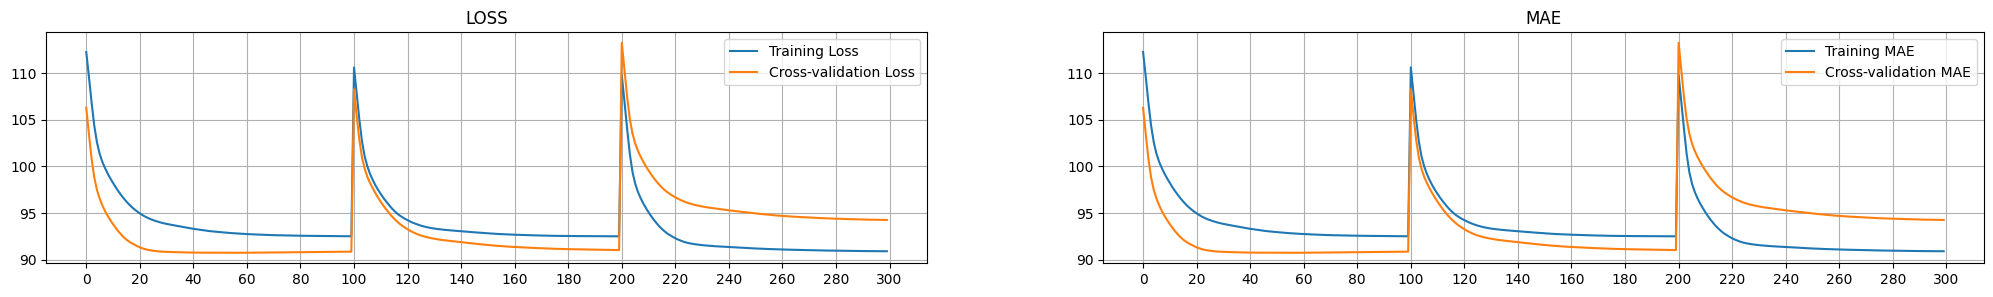

In [235]:
plot_cross_validation_loss_mae()

In [236]:
cv_mae()

MAE from cross-validation:
MAE: 93.56 ± 3.54


## d) Model 4 [2 points]

- Same as Model 2, but use the rmsprop optimizer when training.

### Cross-Validation with Model4

In [237]:
model4 = create_model(first_layer=128, second_layer=64, activation='relu', optimizer='rmsprop')
cross_validation(X_train_df, model4, 'rmsprop')

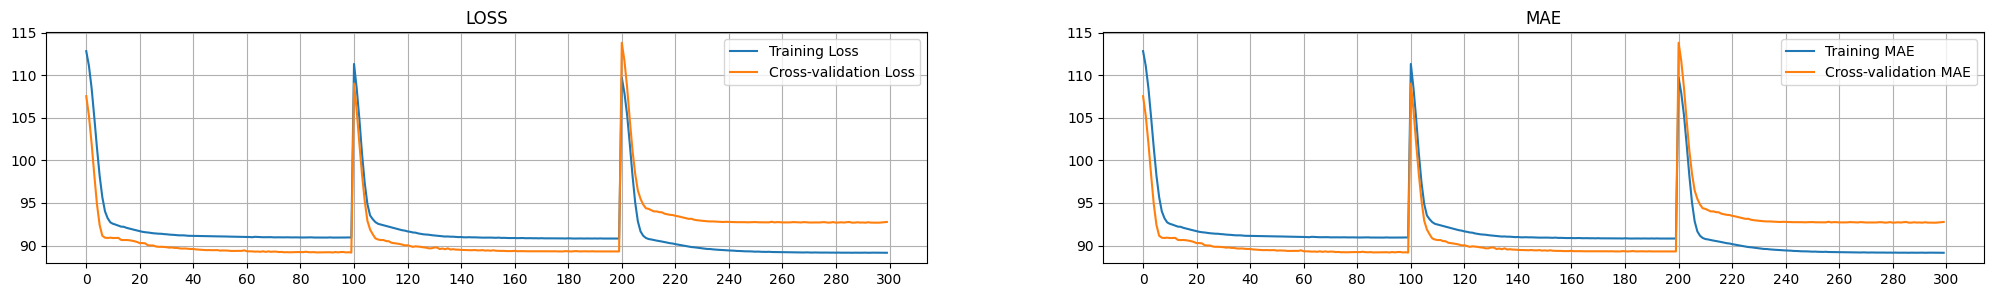

In [238]:
plot_cross_validation_loss_mae()

In [239]:
cv_mae()

MAE from cross-validation:
MAE: 91.45 ± 3.54


## e) Model Comparison [1 point]

Which model performed best? Offer your thoughts on why the particular choice of hyperparameters led to improved performance for this model.

### Evaluation of All Models

In [240]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [241]:
X_test_df = pd.DataFrame(X_test)

In [264]:
def eval_model(model, model_name, X_test, y_test):
  pred = model.predict(X_test)
  mae = mean_absolute_error(y_test.values, pred)
  #print('MAE: {:.2f} of {model}'.format(mae, model_name))

  #variance = explained_variance_score(y_test, pred)
  #print('Proportion of variance predictable from features for {model}: {:.2f}'.format(model_name, variance))

NOTE: 2 additional points are awarded based on code documentation and overall clarity of work.

In [265]:
eval_model(model1, "model1", X_test_df, y_test)

4/4 [==============================] - 0s 3ms/step


ValueError: y_true and y_pred have different number of output (2!=1)

In [ ]:
# We are looking for a clear explanation of results with each response. We want you to attempt to
# explain the _how_ and _why_ behind your answers, and not just the what, do demonstrate
# your knowledge of the concepts discussed in class. Answers should be backed up with
# visualizations (e.g. plots, charts).

# Code should be easy to follow by using sensical naming conventions for function and variable
# names, providing useful code comments, and refactoring repeated code into re-usable functions.